In [11]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import collections

In [2]:
df = pd.read_csv("results/discrepance/run0/trial0/run/tensions.txt")

In [35]:
def tensions_mean_std(dir_path: str):
    rts_tensions = collections.defaultdict(list)
    for i, trial in enumerate(os.listdir(dir_path)):
        data_path = os.path.join(dir_path, trial, "run/tensions.txt")
        df = pd.read_csv(data_path)
        acc_tensions = df.applymap(lambda x: x**2).sum().drop("step", 0)
        for ind, val in acc_tensions.items():
            rts_tensions[ind].append(val)

    rts_tensions_df = pd.DataFrame(rts_tensions)
    return rts_tensions_df.mean(0), rts_tensions_df.std(0) 

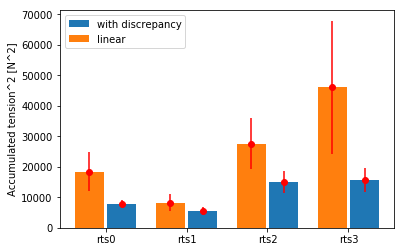

In [57]:
tensions, errors = tensions_mean_std("results/discrepance/run0")
x = np.arange(len(tensions))
bar_width = 0.4

plt.bar(x + bar_width / 2, tensions, bar_width*0.9, label="with discrepancy")
plt.errorbar(x + bar_width / 2, tensions, errors, fmt='ro', ecolor='red')

tensions, errors = tensions_mean_std("results/linear/run0")
plt.bar(x - bar_width / 2, tensions, bar_width*0.9, label="linear")
plt.errorbar(x - bar_width / 2, tensions, errors, fmt='ro', ecolor='red')

plt.xticks(x, ["rts{}".format(v) for v in range(len(tensions))])
plt.ylabel("Accumulated tension^2 [N^2]")
plt.legend(loc='upper left')

plt.savefig("graphs/AccumulatedTensions_run0.png")

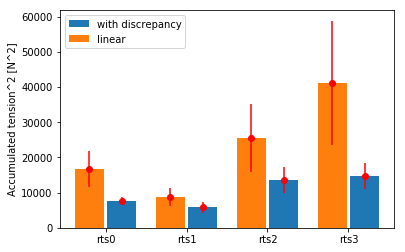

In [59]:
tensions, errors = tensions_mean_std("results/discrepance/run1")
x = np.arange(len(tensions))
bar_width = 0.4

plt.bar(x + bar_width / 2, tensions, bar_width*0.9, label="with discrepancy")
plt.errorbar(x + bar_width / 2, tensions, errors, fmt='ro', ecolor='red')

tensions, errors = tensions_mean_std("results/linear/run1")
plt.bar(x - bar_width / 2, tensions, bar_width*0.9, label="linear")
plt.errorbar(x - bar_width / 2, tensions, errors, fmt='ro', ecolor='red')

plt.xticks(x, ["rts{}".format(v) for v in range(len(tensions))])
plt.ylabel("Accumulated tension^2 [N^2]")
plt.legend(loc='upper left')

plt.savefig("graphs/AccumulatedTensions_run1.png")